In [1]:
html_str = """
<html>
  <head>
    <title>안녕하세요</title>
  </head>
  <body>
    <div id="container">
      <p class='p1'>hello</p>
      <p>Bye</p>
    </div>
  </body>
</html>"""

html 문자열을 파이썬에서 다뤄야 한다.
- HTML 문자열을 엘리먼트화 해서 파이썬에서 **객체**로 다룰 수 있어야 한다.
  - `BeautifulSoup`을 이용해서 HTML 문자열을 엘리먼트 객체로 바꿔줄 수 있다!

In [6]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_str, 'html.parser') # parsing : 어떤 문자열을 내가 원하는 형태로 바꿔주는 것
soup


<html>
<head>
<title>안녕하세요</title>
</head>
<body>
<div id="container">
<p class="p1">hello</p>
<p>Bye</p>
</div>
</body>
</html>

## find 방식
- 'find('태그명', '속성값 딕셔너리')
    - 한 개의 element 만 찾기
- 'find_all('태그명', '속성값 딕셔너리')
    - 여러 개의 element 찾기 (리스트)

In [7]:
# div 중에 id 속성이 container 인 것 찾기
soup.find('div', {'id' : 'container'})

<div id="container">
<p class="p1">hello</p>
<p>Bye</p>
</div>

* 상위 elemnet 를 선택하면 거기에 속한 하위 element 도 모두 선택됨
* 선택한 element 는 한 개다! (div) => 3개 아님

In [8]:
# p 중에 class 가 p1 인 것 찾기
soup.find('p', {'class' : 'p1'})

<p class="p1">hello</p>

In [9]:
# 모든 p 찾기
soup.find_all('p')

[<p class="p1">hello</p>, <p>Bye</p>]

* find_all 은 list 형태로 반환

In [10]:
# 가자아 마지막 p element 를 가져오기
soup.find_all('p')[-1]

<p>Bye</p>

In [13]:
p_p1 = soup.find('p', {'class' : 'p1'})
p_p1

<p class="p1">hello</p>

In [14]:
p_p1.nextSibling

'\n'

* Bye 추출을 위해 p_p1 의 형제를 찾았는데, \n 이 나왔다
* html 문서의 개행 문자도 element 이기 때문
* **보이지 않는 text node 가 존재하기 때문에, 이에 유념**

In [15]:
p_p1.nextSibling.nextSibling

<p>Bye</p>

In [16]:
p_p1.text

'hello'

In [17]:
# get 은 속성값을 얻을 때 사용
p_p1.get('class')

['p1']

## 선택자(selector) 사용 방식
- `soup.select(선택자)` : 선택자에 의해 엘리먼트를 **여러 개** 선택
- `soup.select_one(선택자)` : 선택자에 의해 엘리먼트를 한 개만 선택

In [18]:
# id 선택 시 select_one 쓰면 좋다
soup.select_one('#container')

<div id="container">
<p class="p1">hello</p>
<p>Bye</p>
</div>

In [19]:
soup.select_one('#container > .p1')

<p class="p1">hello</p>

In [20]:
soup.select('p')

[<p class="p1">hello</p>, <p>Bye</p>]

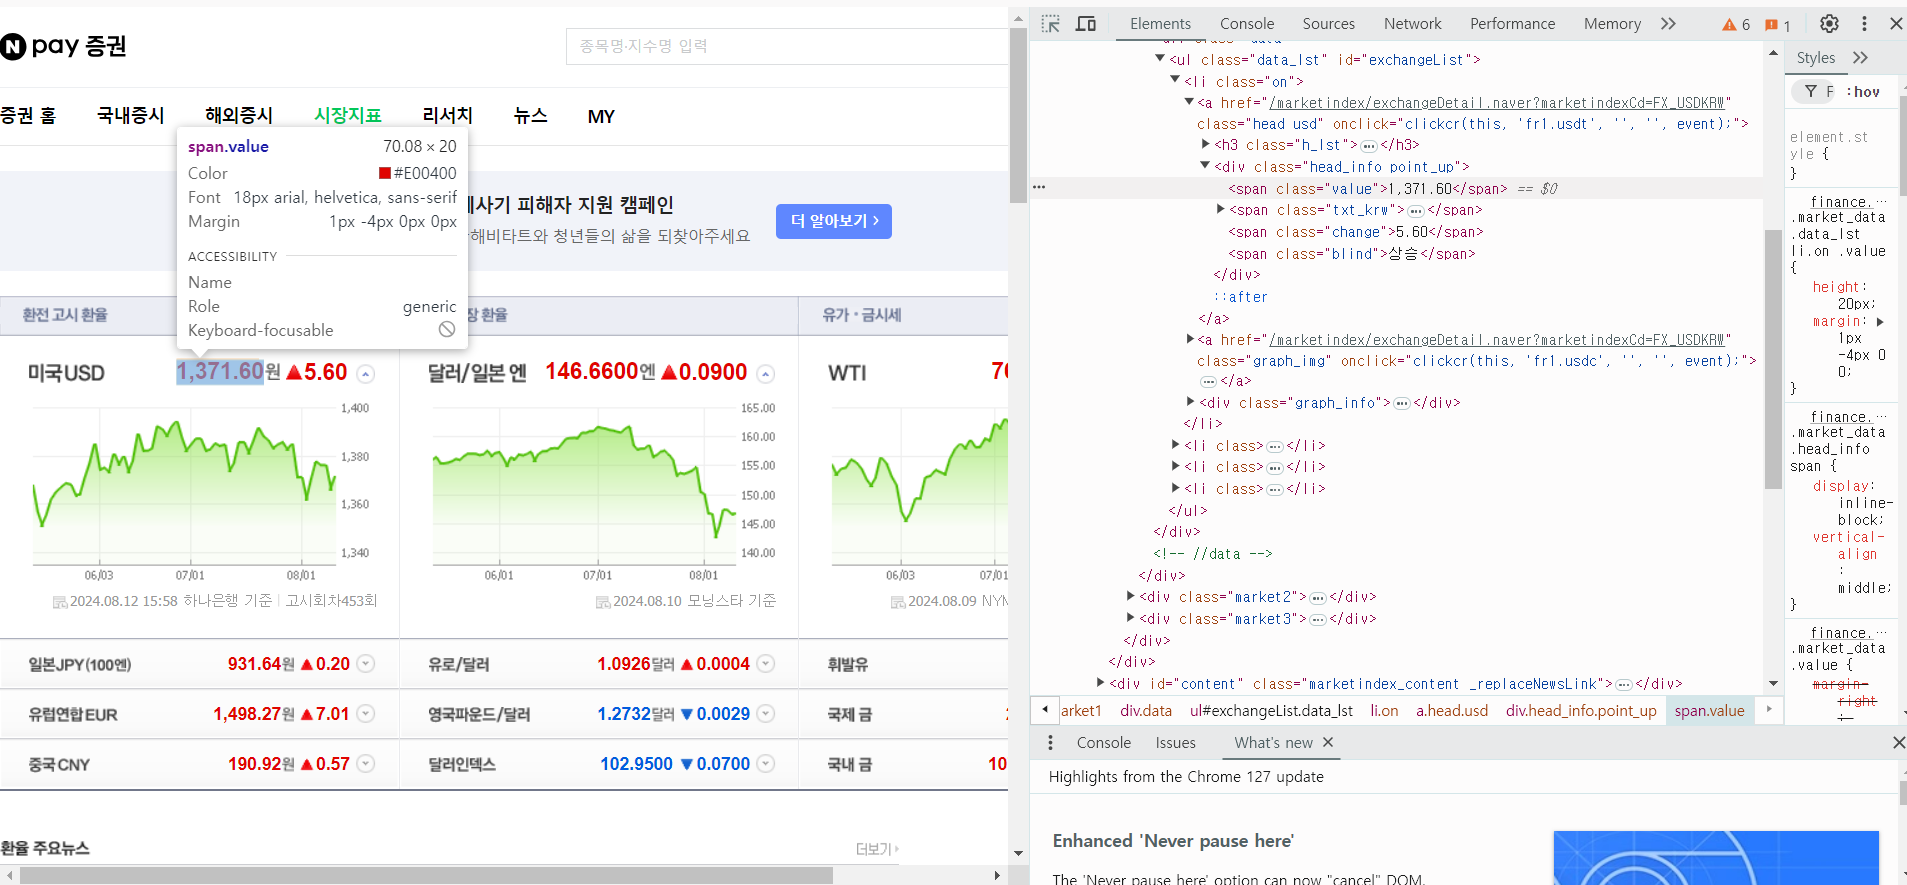
* elements : 브라우저가 받아온 html 문서
* 왼쪽의 inspector 로 원하는 element 선택
* 미국 USD 의 환율 정보를 가져와보자
* 데이터 묶음 단위 기준과 그 상위 단위를 생각하자 (원하는 데이터 덩어리 찾기, 여기서는 li, ul)

## 네이버 환율 정보 가져오기
* 웹 접속을 위해 `requests` 사용
* html 문서를 가져오고 element 객체화를 시키기 위해서 BeautifulSoup 사용

In [21]:
import requests
from bs4 import BeautifulSoup

In [22]:
# 요청할 URL
URL = 'https://finance.naver.com/marketindex/'

In [ ]:
response = requests.get(URL)
page = response.content # 접속한 웹 사이트의 응답을 문자열로 가져옴
page

In [ ]:
soup = BeautifulSoup(page, 'html.parser')
soup

In [31]:
# 가져오고자 하는 ul 의 id 가 exchangeList
# 그 중 데이터가 들어있는 리스트인 li 선택
exchange_list = soup.select('#exchangeList > li')
exchange_list

[<li class="on">
 <a class="head usd" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdt', '', '', event);">
 <h3 class="h_lst"><span class="blind">미국 USD</span></h3>
 <div class="head_info point_up">
 <span class="value">1,371.70</span>
 <span class="txt_krw"><span class="blind">원</span></span>
 <span class="change">5.70</span>
 <span class="blind">상승</span>
 </div>
 </a>
 <a class="graph_img" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdc', '', '', event);">
 <img alt="" height="153" src="https://ssl.pstatic.net/imgfinance/chart/marketindex/FX_USDKRW.png" width="295"/>
 </a>
 <div class="graph_info">
 <span class="time">2024.08.12 16:10</span>
 <span class="source">하나은행 기준</span>
 <span class="count">고시회차<span class="num">456</span>회</span>
 </div>
 </li>,
 <li class="">
 <a class="head jpy" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_JPYKRW" onclick="clickcr(this, 'fr1.jpyt

In [37]:
# 확인을 위한 sample code
sample_li = exchange_list[0]
sample_li

<li class="on">
<a class="head usd" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdt', '', '', event);">
<h3 class="h_lst"><span class="blind">미국 USD</span></h3>
<div class="head_info point_up">
<span class="value">1,371.70</span>
<span class="txt_krw"><span class="blind">원</span></span>
<span class="change">5.70</span>
<span class="blind">상승</span>
</div>
</a>
<a class="graph_img" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdc', '', '', event);">
<img alt="" height="153" src="https://ssl.pstatic.net/imgfinance/chart/marketindex/FX_USDKRW.png" width="295"/>
</a>
<div class="graph_info">
<span class="time">2024.08.12 16:10</span>
<span class="source">하나은행 기준</span>
<span class="count">고시회차<span class="num">456</span>회</span>
</div>
</li>

In [39]:
sample_li.select_one('.h_lst').text

'미국 USD'

In [40]:
# find 사용?
sample_li.find('h3', {'class' : 'h_lst'}).text

'미국 USD'

In [47]:
# 환율
float(sample_li.select_one('span.value').text.replace(',', ''))

1371.7

In [63]:
float(sample_li.select_one('span.change').text)

5.7

In [55]:
# 상승 출력하기
sample_li.select_one('div > .blind').text
# sample_li.select('.blind')[-1].text => 원소가 많으면 비추

'상승'

In [70]:
c_name_list = []
exchange_rate_list = []
change_list = []
updown_list = []

for exchange in exchange_list:
    c_name=exchange.select_one('.h_lst').text
    exchange_rate=float(exchange.select_one('span.value').text.replace(',', ''))
    change=float(exchange.select_one('span.change').text)
    updown=exchange.select_one('div > .blind').text

    c_name_list.append(c_name)
    exchange_rate_list.append(exchange_rate)
    change_list.append(change)
    updown_list.append(updown)

In [71]:
c_name_list

['미국 USD', '일본 JPY(100엔)', '유럽연합 EUR', '중국 CNY']

In [72]:
exchange_rate_list

[1371.7, 931.64, 1498.24, 190.99]

In [73]:
change_list

[5.7, 0.2, 6.98, 0.64]

In [74]:
updown_list

['상승', '상승', '상승', '상승']

In [75]:
import pandas as pd

exchange_data = {
    '국가' : c_name_list,
    '환율' : exchange_rate_list,
    '변동' : change_list,
    '등락' : updown_list
}

df_exchange = pd.DataFrame(exchange_data)
df_exchange

,국가,환율,변동,등락
0,미국 USD,1371.70,5.70,상승
1,일본 JPY(100엔),931.64,0.20,상승
2,유럽연합 EUR,1498.24,6.98,상승
3,중국 CNY,190.99,0.64,상승
